## Graphics of infidelities obtained in the estimation of pure states.

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit 

### 1. Cargar datos de las simulaciones

In [2]:
dimensiones = np.array([4,8,16,32,64])
potencias = np.array([5 , 5.5 , 6 , 6.5 , 7])

# Diccionario anidado: datos[d][n] = DataFrame
datos_fid1 = defaultdict(dict)
datos_fid2 = defaultdict(dict)

for d in dimensiones:
    for n in potencias:
        archivo1 = f'24/d={d},N={n},fid1.csv'
        archivo2 = f'24/d={d},N={n},fid2.csv'
        try:
            df1 = pd.read_csv(archivo1)
            datos_fid1[d][n] = df1

            df2 = pd.read_csv(archivo2)
            datos_fid2[d][n] = df2

        except FileNotFoundError:
            print(f'⚠️ Archivo no encontrado: {archivo1}')

## 2. Create arrays 

Ensemble vs Infidelity

In [3]:
## Primera etapa

fid1_means_N = {}  # fid1_means[d] = lista de promedios para cada n
fid1_stds_N = {}   # fid1_stds[d] = lista de desviaciones estándar para cada n

for d in dimensiones:
    fid1_means_N[d] = []
    fid1_stds_N[d] = []
    
    for n in potencias:
        datos = datos_fid1[d][n]['Mean'].values
        fid1_means_N[d].append(np.mean(datos))
        fid1_stds_N[d].append(np.std(datos))

## Segunda etapa

fid2_means_N = {}  # fid1_means[d] = lista de promedios para cada n
fid2_stds_N = {}   # fid1_stds[d] = lista de desviaciones estándar para cada n

for d in dimensiones:
    fid2_means_N[d] = []
    fid2_stds_N[d] = []
    
    for n in potencias:
        datos = datos_fid2[d][n]['Mean'].values
        fid2_means_N[d].append(np.mean(datos))
        fid2_stds_N[d].append(np.std(datos))


Dimension vs Infidelity

In [4]:
## Primera etapa

fid1_means_d = {}  # fid1_means[n] = lista de promedios para cada d
fid1_stds_d = {}   # fid1_stds[n] = lista de desviaciones estándar para cada d

for n in potencias:
    fid1_means_d[n] = []
    fid1_stds_d[n] = []
    
    for d in dimensiones:
        datos = datos_fid1[d][n]['Mean'].values
        fid1_means_d[n].append(np.mean(datos))
        fid1_stds_d[n].append(np.std(datos))

## Segunda etapa

fid2_means_d = {}  # fid1_means[n] = lista de promedios para cada d
fid2_stds_d = {}   # fid1_stds[n] = lista de desviaciones estándar para cada d

for n in potencias:
    fid2_means_d[n] = []
    fid2_stds_d[n] = []
    
    for d in dimensiones:
        datos = datos_fid2[d][n]['Mean'].values
        fid2_means_d[n].append(np.mean(datos))
        fid2_stds_d[n].append(np.std(datos))

## 3. Graphs

In [ ]:
## Gill-Massar bound function

def GM( dimension , ensamble):
    return (dimension - 1) / ensamble

colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

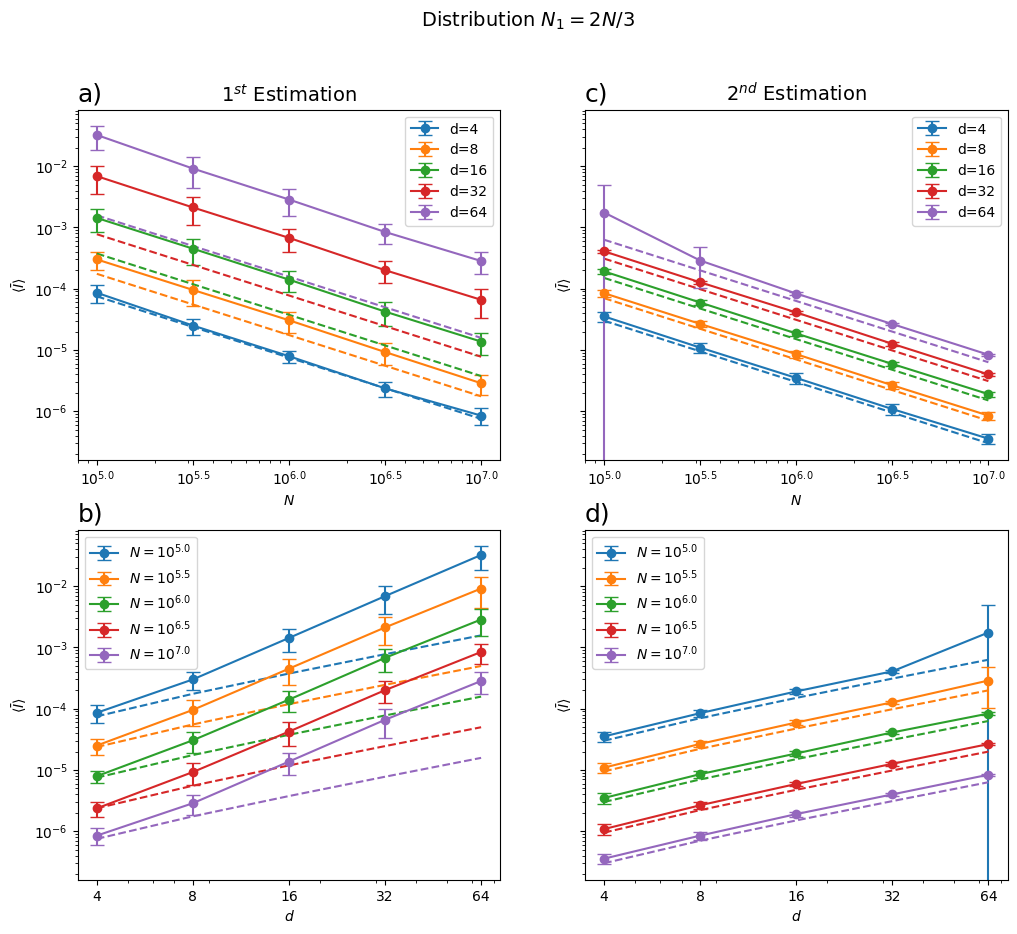

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10) , sharey=True)
fig.suptitle(r"Distribution $N_1 =2N/3$", fontsize=14)

## Grafico de la izquierda

i = 0
for d in dimensiones:
    axs[0 , 0].errorbar(10**potencias, np.ones(len(potencias))-fid1_means_N[d], yerr=fid1_stds_N[d], color = colores[i], label=f'd={d}', marker='o', capsize=5)
    axs[0 , 0].plot( 10**potencias , GM(d , 2*10**potencias/5), color = colores[i], linestyle='--')
    i += 1

axs[0 , 0].set_xlabel('$N$')
axs[0 , 0].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[0, 0].set_title('a)', loc='left', fontsize='18')
axs[0 , 0].set_title('$1^{st}$ Estimation', fontsize='14')

axs[0 , 0].set_xscale('log')  # escala logarítmica en eje x
axs[0 , 0].set_yscale('log') 

axs[0 , 0].set_xticks(10**potencias) 
axs[0 , 0].set_xticklabels([fr'$10^{{{n}}}$' for n in potencias], fontsize=10)

axs[0 , 0].legend()
axs[0 , 0].grid(True)


## Grafico de la derecha

i = 0
for d in dimensiones:
    axs[0 , 1].errorbar(10**potencias, np.ones(len(potencias))-fid2_means_N[d], yerr=fid2_stds_N[d], color = colores[i], label=f'd={d}', marker='o', capsize=5)
    axs[0 , 1].plot( 10**potencias , GM(d , 10**potencias), color = colores[i], linestyle='--')
    i += 1

axs[0 , 1].set_xlabel('$N$')
axs[0 , 1].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[0 , 1].set_title('c)', loc='left', fontsize='18')
axs[0 , 1].set_title('$2^{nd}$ Estimation', fontsize='14')

axs[0 , 1].set_xscale('log')  # escala logarítmica en eje x
axs[0 , 1].set_yscale('log') 

axs[0 , 1].set_xticks(10**potencias) 
axs[0 , 1].set_xticklabels([fr'$10^{{{n}}}$' for n in potencias], fontsize=10)

axs[0 , 1].legend()
axs[0 , 1].grid()

##############################################################################################################

## Grafico de arriba

i = 0
for n in potencias:
    axs[ 1 , 0 ].errorbar(dimensiones, np.ones(len(dimensiones))-fid1_means_d[n], yerr=fid1_stds_d[n], color = colores[i], label=fr'$N=10^{{{n}}}$', marker='o', capsize=5)
    axs[ 1 , 0 ].plot( dimensiones , GM(dimensiones , 2*10**n/5), color = colores[i], linestyle='--')
    i += 1

axs[ 1 , 0 ].set_xlabel('$d$')
axs[ 1 , 0 ].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[ 1 , 0].set_title('b)', loc='left', fontsize='18')
#axs[ 1 , 0 ].set_title('Fidelidad media primera etapa vs d para diferentes N')

axs[ 1 , 0 ].set_xscale('log')  # escala logarítmica en eje x
axs[ 1 , 0 ].set_yscale('log') 

axs[1 , 0].set_xticks(dimensiones) 
axs[1 , 0].set_xticklabels(dimensiones, fontsize=10)

axs[ 1 , 0 ].legend()
axs[ 1 , 0 ].grid(True)

## Grafico de abajo

i = 0
for n in potencias:
    axs[1 , 1].errorbar(dimensiones, np.ones(len(dimensiones))-fid2_means_d[n], yerr=fid2_stds_d[n], color = colores[i], label=fr'$N=10^{{{n}}}$', marker='o', capsize=5)
    axs[1 , 1].plot( dimensiones , GM(dimensiones , 10**n), color = colores[i], linestyle='--')
    i += 1

axs[1 , 1].set_xlabel('$d$')
axs[1 , 1].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[1 , 1].set_title('d)', loc='left', fontsize='18')
#axs[1 , 1].set_title('Fidelidad media final vs d para diferentes N')

axs[1 , 1].set_xscale('log')  # escala logarítmica en eje x
axs[1 , 1].set_yscale('log') 

axs[1 , 1].set_xticks(dimensiones) 
axs[1 , 1].set_xticklabels(dimensiones, fontsize=10)

axs[1 , 1].legend()
axs[1 , 1].grid(True)

#quitar grids
axs[0,0].grid(False)
axs[0,1].grid(False)
axs[1,0].grid(False)
axs[1,1].grid(False)

#plt.savefig('PURE-MIN-23-V2.pdf', bbox_inches='tight')


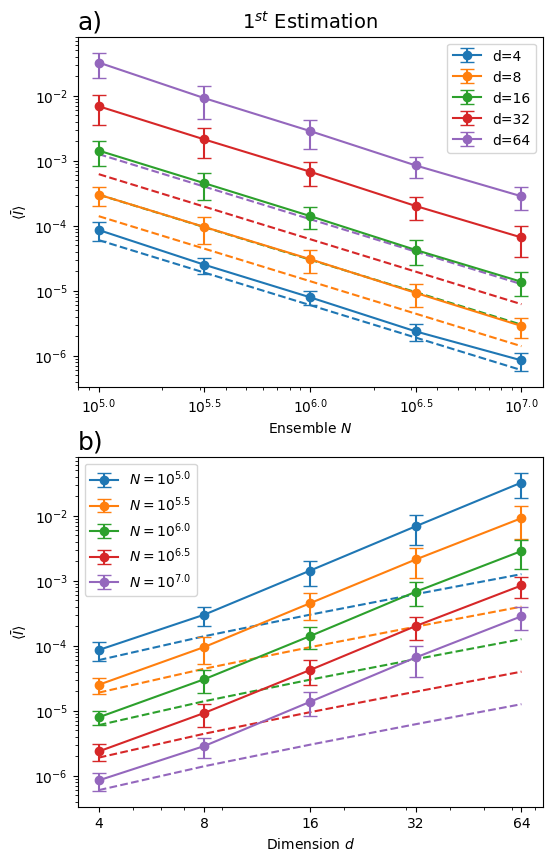

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10) , sharey=True)
#fig.suptitle(r"$1^{st}$ Estimation", fontsize=14)


## Grafico de arriba

i = 0
for d in dimensiones:
    axs[0].errorbar(10**potencias, np.ones(len(potencias))-fid1_means_N[d], yerr=fid1_stds_N[d], color = colores[i], label=f'd={d}', marker='o', capsize=5)
    axs[0].plot( 10**potencias , GM(d , 10**potencias/2), color = colores[i], linestyle='--')
    i += 1

axs[0].set_xlabel(r'Ensemble $N$')
axs[0].set_ylabel(r'$\langle\bar{I}\rangle$')

axs[0].set_xscale('log')  # escala logarítmica en eje x
axs[0].set_xticks(10**potencias) # posiciones
axs[0].set_xticklabels([fr'$10^{{{n}}}$' for n in potencias])
axs[0].set_yscale('log') 
axs[0].set_title('a)', loc='left', fontsize='18')
axs[0].set_title(r"$1^{st}$ Estimation", fontsize=14)

axs[0].legend()
axs[0].grid(False)

## Grafico de abajo

i = 0
for n in potencias:
    axs[ 1 ].errorbar(dimensiones, np.ones(len(dimensiones))-fid1_means_d[n], yerr=fid1_stds_d[n], color = colores[i], label=fr'$N=10^{{{n}}}$', marker='o', capsize=5)
    axs[ 1 ].plot( dimensiones , GM(dimensiones , 10**n/2), color = colores[i], linestyle='--')
    i += 1

axs[ 1 ].set_xlabel(r'Dimension $d$')
axs[ 1 ].set_ylabel(r'$\langle\bar{I}\rangle$')
axs[ 1 ].set_title('b)', loc='left', fontsize='18')

axs[ 1 ].set_xscale('log')  # escala logarítmica en eje x
axs[ 1 ].set_xticks(dimensiones) # posiciones
axs[ 1 ].set_xticklabels([str(d) for d in dimensiones]) 
axs[ 1 ].set_yscale('log') 

axs[ 1 ].legend()
axs[ 1 ].grid(False)



plt.savefig('24-estimation1.pdf', bbox_inches='tight')

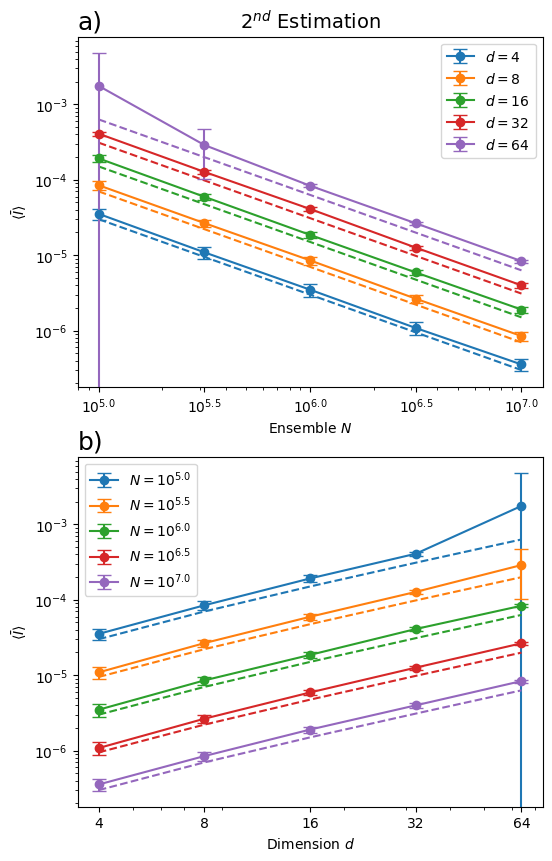

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10) , sharey=True)
#fig.suptitle(r"$1^{st}$ Estimation", fontsize=14)

## Grafico de arriba

i = 0
for d in dimensiones:
    axs[0].errorbar(10**potencias, np.ones(len(potencias))-fid2_means_N[d], yerr=fid2_stds_N[d], color = colores[i], label=f'$d={d}$', marker='o', capsize=5)
    axs[0].plot( 10**potencias , GM(d , 10**potencias), color = colores[i], linestyle='--')
    i += 1

axs[0].set_xlabel(r'Ensemble $N$')
axs[0].set_ylabel(r'$\langle\bar{I}\rangle$')

axs[0].set_xscale('log')  # escala logarítmica en eje x
axs[0].set_xticks(10**potencias) # posiciones
axs[0].set_xticklabels([fr'$10^{{{n}}}$' for n in potencias])
axs[0].set_yscale('log') 
axs[0].set_title('a)', loc='left', fontsize='18')
axs[0].set_title(r"$2^{nd}$ Estimation", fontsize=14)


axs[0].legend()
axs[0].grid(False)

## Grafico de abajo

i = 0
for n in potencias:
    axs[ 1 ].errorbar(dimensiones, np.ones(len(dimensiones))-fid2_means_d[n], yerr=fid2_stds_d[n], color = colores[i], label=fr'$N=10^{{{n}}}$', marker='o', capsize=5)
    axs[ 1 ].plot( dimensiones , GM(dimensiones , 10**n), color = colores[i], linestyle='--')
    i += 1

axs[ 1 ].set_xlabel(r'Dimension $d$')
axs[ 1 ].set_ylabel(r'$\langle\bar{I}\rangle$')
axs[ 1 ].set_title('b)', loc='left', fontsize='18')

axs[ 1 ].set_xscale('log')  # escala logarítmica en eje x
axs[ 1 ].set_xticks(dimensiones) # posiciones
axs[ 1 ].set_xticklabels([str(d) for d in dimensiones]) 
axs[ 1 ].set_yscale('log') 

axs[ 1 ].legend()
axs[ 1 ].grid(False)



plt.savefig('24-estimation2.pdf', bbox_inches='tight')

## 4. Curve fits

We performed curve fitting of the plotted data considering the following model
$$

I = \alpha \frac{(d-1)^\gamma}{N^\beta}.

$$

To find the values of $\beta, \gamma$ we perform linear curve adjustments considering the logarithm of the previous function,
$$
\log(I) = \log(\alpha) - \beta \log(N) + \gamma \log(d-1).
$$
For the $\beta$ fittings, we set the values of the ensemble. For the $\gamma$ fittings we set the dimension value. Finally, for the $\alpha$ adjustment, we consider the average of the adjusted values.

### 4.1 For each dimension, adjust the ensemble vs. infidelity curve. We found the values of $\beta$.

In [9]:
betas = []

for d in dimensiones:
    xdata = potencias 
    ydata = np.log10(np.ones(len(potencias))-fid2_means_N[d])

    params , cov = np.polyfit(xdata, ydata, 1, cov=True)  # grado 1 = lineal

    a_fit , b_fit = params
    betas.append(a_fit)

    a_err , b_err = np.sqrt(np.diag(cov))

    #### Grafico del ajuste ###############

    #y_fit = a_fit * xdata + b_fit

    #plt.plot(xdata, ydata, 'o', label='Datos')
    #plt.plot(xdata, y_fit, '--', label=f'alpha={a_fit:.2f},std={a_err:.3f}')
    #plt.legend()
    #plt.grid(True)
    #plt.title('Ajuste lineal con numpy')
    #plt.show()

    ########################################

    print(f'd={d}, beta={a_fit}, std={a_err}')

print(f'Mean beta = {np.mean(betas)}')


d=4, beta=-0.9989213064578867, std=0.005020829884870038
d=8, beta=-0.9997809639764534, std=0.0021598181211385835
d=16, beta=-1.0018006396175476, std=0.003881988359508622
d=32, beta=-1.0044452491321094, std=0.002997017852949391
d=64, beta=-1.1360644483628015, std=0.06616174655740253
Mean beta = -1.0282025215093598


In [10]:
j = 2
xdata = potencias[j:]
ydata = np.log10(np.ones(len(potencias)-j)-fid2_means_N[64][j:])

params , cov = np.polyfit(xdata, ydata, 1, cov=True)  # grado 1 = lineal

a_fit , b_fit = params
betas.append(a_fit)

a_err , b_err = np.sqrt(np.diag(cov))

print(f'd={64}, beta={a_fit}, std={a_err}')

d=64, beta=-0.998530618840944, std=0.0017133549347835674


### 4.2 For each ensemble adjust dimension curve vs infidelity. We find the values of $\gamma$.

In [11]:
gammas = []

for n in potencias:
    xdata = np.log10(dimensiones-1)
    ydata = np.log10(np.ones(len(dimensiones))-fid2_means_d[n])

    params , cov = np.polyfit(xdata, ydata, 1, cov=True)  # grado 1 = lineal

    a_fit , b_fit = params
    gammas.append(a_fit)

    a_err , b_err = np.sqrt(np.diag(cov))

    ### Gráfico del ajuste ################################

    #y_fit = a_fit * xdata + b_fit

    #plt.plot(xdata, ydata, 'o', label='Datos')
    #plt.plot(xdata, y_fit, '--', label=f'alpha = {a_fit:.2f} , std={a_err:.3f}')
    #plt.legend()
    #plt.grid(True)
    #plt.title('Ajuste lineal con numpy')
    #plt.show()

    #######################################################

    print(f'N={n}, gamma={a_fit}, std={a_err}')

print(f'Mean gamma = {np.mean(gammas)}')

N=5.0, gamma=1.233243501770059, std=0.11148090498399087
N=5.5, gamma=1.0700440965055709, std=0.011177451346646805
N=6.0, gamma=1.0443798783981932, std=0.0064382143400243215
N=6.5, gamma=1.0492847578772362, std=0.0014517934198181415
N=7.0, gamma=1.037013539758297, std=0.0032879312222304966
Mean gamma = 1.0867931548618714


In [12]:
xdata = np.log10(dimensiones-1)[:-2]
ydata = np.log10(np.ones(len(dimensiones)-2)-fid1_means_d[5.0][:-2])

params , cov = np.polyfit(xdata, ydata, 1, cov=True)  # grado 1 = lineal

a_fit , b_fit = params
gammas.append(a_fit)

a_err , b_err = np.sqrt(np.diag(cov))
print(f'N={5.0}, gamma={a_fit}, std={a_err}')

N=5.0, gamma=1.7422643552699322, std=0.16312775312559236


### 4.3 Perform cruvefit to find the values of $\alpha$ using as values of $\beta$ and $\gamma$ the average of the values found in the previous fittings.

In [13]:
## ajuste por dimension

alphas = []

for d in dimensiones:

    xdata = potencias
    ydata = np.ones(len(potencias))-fid2_means_N[d]

    def modelo(potencia , alpha):
        return alpha*(d-1)**(1)/(10**potencia)**(1)
    
    params, cov = curve_fit(modelo, xdata, ydata)

    alphas.append(params)

    print(f'd={d} , alpha={params} , std={np.sqrt(cov)[0]}')

print(f'Mean alpha = {np.mean(alphas)}')

d=4 , alpha=[1.17420536] , std=[0.00380892]
d=8 , alpha=[1.20702515] , std=[0.00084544]
d=16 , alpha=[1.27519536] , std=[0.00375422]
d=32 , alpha=[1.31277757] , std=[0.0025482]
d=64 , alpha=[2.64711242] , std=[0.20208129]
Mean alpha = 1.5232631702828692
